In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lab 6 - Fisher's Linear Discriminant and Logistic Regression
- For equations, refer to Bishop's book, Section 4.1.4 and the slides

# Part I - Fisher's Linear Discriminant for Binary Classification (2 classes)

## Data Generation and Visualisation
- First we'll use scikit-learn to generate 2 blobs of data in 2D, using the [make_blobs()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function.
- The data consists of 600 points divided into 2 classes, 0 and 1.

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=600, centers=2, n_features=2, random_state=0)

Let's confirm the data has two classes

In [4]:
np.unique(y)

array([0, 1])

## Exercise 1
- Now create a scatter plot to visualise the generated data. 
- Make sure to paint each point based on the class they belong to, as shown in the Figure below.

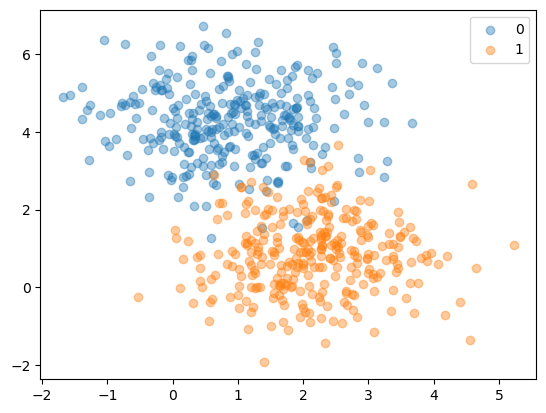

In [5]:
# your code goes here:

plt.scatter(x = X[y == 0, 0], y = X[y == 0, 1], alpha = 0.4, label = "0")
plt.scatter(x = X[y == 1, 0], y = X[y == 1, 1], alpha = 0.4, label = "1")
plt.legend()
plt.show()

## Exercise 2
* Now plot a histogram of the data projected on each of the 2 dimensions of $X$ ($0$ and $1$)

As an example, below is a figure that shows the projection on dimension $1$.

_Tips:_ 
* You can either use `histplot()` to generate the plot, in which case it might be easier to pack $X$ and $y$ into a pandas DataFrame.
* Alternatively, considering that you will generate this plot many times throughout this lab, you can write a function that takes the projected vector and the class labels.
* Use 30 bins to obtain a similar plot.

In [6]:
# Função para plotar o histograma da projeção dos dados
def projection_histogram(data, labels, classes, vector, title):
    # Projetando os dados
    projected_data = data @ vector

    # Intervalo dos dados
    min = projected_data.min()
    max = projected_data.max()

    # Barras idênticas para todas as classes
    common_bars = np.linspace(min, max, 31)

    # Plotando o histograma de cada classe
    for classe in classes:
        plt.hist(projected_data[labels == classe], bins = common_bars, alpha = 0.5, label = classe)

    plt.xlabel("Projection value")
    plt.ylabel("Count")
    plt.title(title)
    plt.legend()
    plt.show()

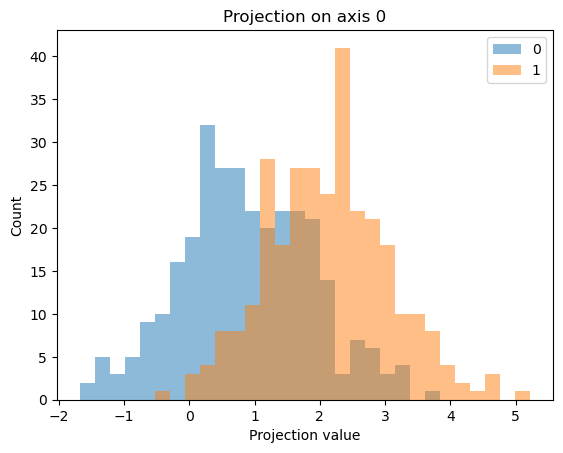

In [7]:
projection_histogram(X, y, [0, 1], np.array([[1], [0]]), "Projection on axis 0")

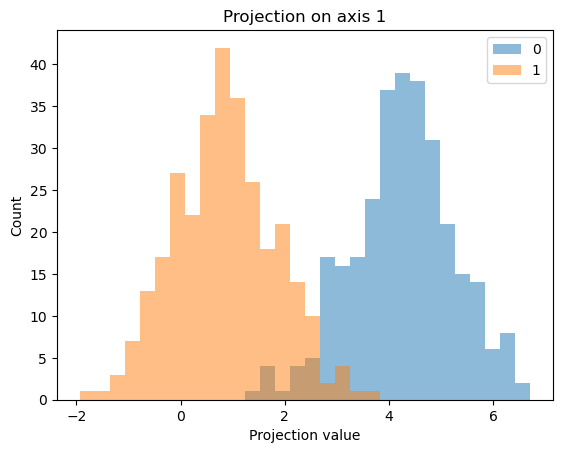

In [8]:
projection_histogram(X, y, [0, 1], np.array([[0], [1]]), "Projection on axis 1")

## Exercise 3 - Implement Fisher's linear discriminant

* Use numpy to calculate $\vec{w}$.
* Plot the data (as you did in Exercise 1), and add a line on the direction of $\vec{w}$ (reference Figure below).
* Project the points onto the calculated vector, and plot the projection (as you did in Exercise 2) (reference Figure below).

In [9]:
# your code goes here:

# Separando as classes
X0 = X[y == 0, :]
X1 = X[y == 1, :]

# Calculando as médias de cada classe
mean_0 = np.mean(X0, axis = 0)
mean_1 = np.mean(X1, axis = 0)

# Subtraindo as médias dos dados
X0 -= mean_0
X1 -= mean_1

# Reunindo os dados, agora normalizados
X_normalized = np.vstack((X0, X1))

# Inicializando a matriz de covariância dentro das classes
Sw = np.zeros((2, 2))

# Para cada ponto, calcula sua matriz de covariância e soma a Sw
for point in X_normalized:
    Sw += point.reshape((2, 1)) @ point.reshape((1, 2))

# Calculando w
w = np.linalg.inv(Sw) @ (mean_1 - mean_0)

w

array([ 0.00223896, -0.00597548])

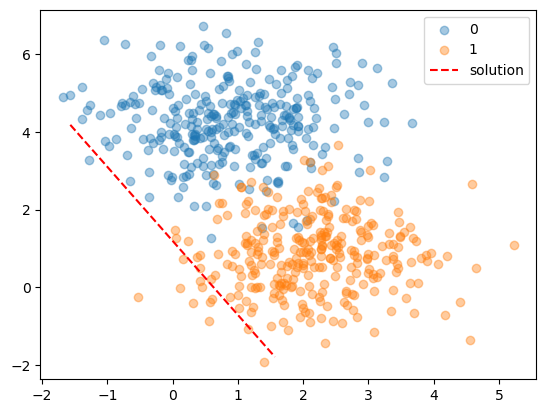

In [10]:
# your code goes here:

# Plotando os dados com a reta de projeção
plt.scatter(x = X[y == 0, 0], y = X[y == 0, 1], alpha = 0.4, label = "0")
plt.scatter(x = X[y == 1, 0], y = X[y == 1, 1], alpha = 0.4, label = "1")
plt.plot([-w[0]*700, w[0]*700], [-w[1]*700, w[1]*300], linestyle = "--", color = "red", label = "solution")
plt.legend()
plt.show()

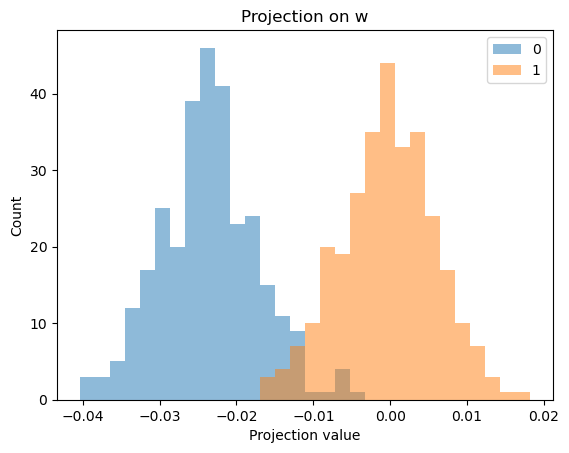

In [11]:
# your code goes here:

# Plotando o histograma da projeção solução
projection_histogram(X, y, [0, 1], w, "Projection on w")

## Exercise 4

* In this exercise you will use the `RidgeClassifier` from sklearn (as shown below) to obtain the class predictions from different types of projections:
    * component 0 of the data
    * component 1 of the data
    * the calculated vector $\vec{w}$
    
* Calculate the accuracy of these predictions using `accuracy_score` from sklearn.

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier

In [13]:
# Follow this structure for each projection:
r = RidgeClassifier()
r.fit(projection, y)
predicted_y = r.predict(projection)
accuracy = accuracy_score(predicted_y, y)

NameError: name 'projection' is not defined

In [ ]:
# your code goes here:

# Projeção sobre o eixo 0
projection_0 = X @ np.array([[1], [0]])
r = RidgeClassifier()
r.fit(projection_0, y)
predicted_y = r.predict(projection_0)
accuracy_0 = accuracy_score(predicted_y, y)

# Projeção sobre o eixo 1
projection_1 = X @ np.array([[0], [1]])
r = RidgeClassifier()
r.fit(projection_1, y)
predicted_y = r.predict(projection_1)
accuracy_1 = accuracy_score(predicted_y, y)

# Projeção sobre o w
projection_w = X @ w
projection_w = projection_w.reshape((-1, 1))
r = RidgeClassifier()
r.fit(projection_w, y)
predicted_y = r.predict(projection_w)
accuracy_w = accuracy_score(predicted_y, y)

print("projection: first dimension, accuracy = ", accuracy_0)
print("projection: second dimension, accuracy = ", accuracy_1)
print("projection: Fisher's linear discriminant, accuracy = ", accuracy_w)

projection: first dimension, accuracy =  0.7366666666666667
projection: second dimension, accuracy =  0.955
projection: Fisher's linear discriminant, accuracy =  0.965


# Part II - Generalised Linear Discriminant (multi-class)

**NOTE:** For this part you will be using a multi-class estimator from scikit-learn (read the [documentation](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda)).

## Exercise 1 - Generate data

* Generate a 3 classes dataset in 2D, with the same rules as before (make 300 points per class)
* Plot the data and then similar histograms (on each dimension) as Part I Exercises 1 and 2.

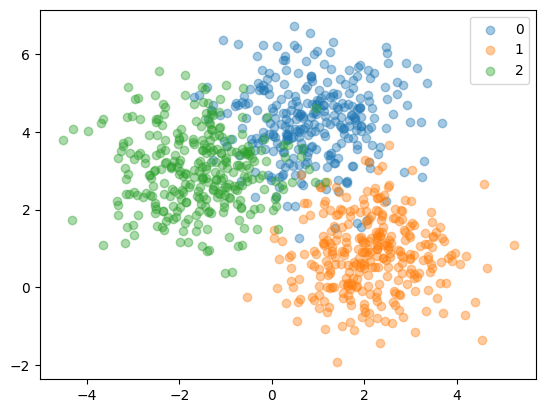

In [ ]:
# your code goes here: 

# Gerando os dados
X, y = make_blobs(n_samples = 900, centers = 3, n_features = 2, random_state = 0)

# Plotando os dados
plt.scatter(x = X[y == 0, 0], y = X[y == 0, 1], alpha = 0.4, label = "0")
plt.scatter(x = X[y == 1, 0], y = X[y == 1, 1], alpha = 0.4, label = "1")
plt.scatter(x = X[y == 2, 0], y = X[y == 2, 1], alpha = 0.4, label = "2")
plt.legend()
plt.show()

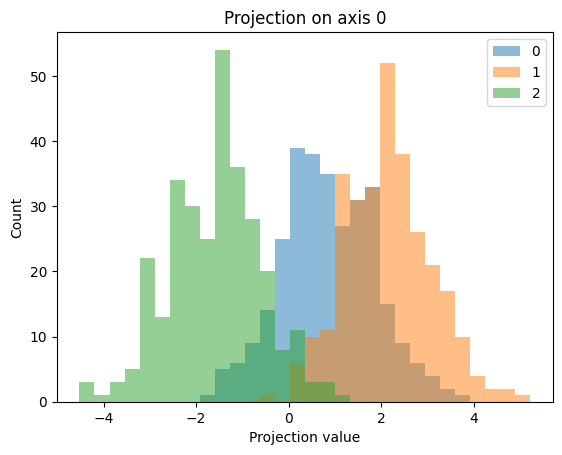

In [ ]:
# your code goes here:

# Projeção sobre a dimensão 0
projection_histogram(X, y, [0, 1, 2], np.array([[1], [0]]), "Projection on axis 0")

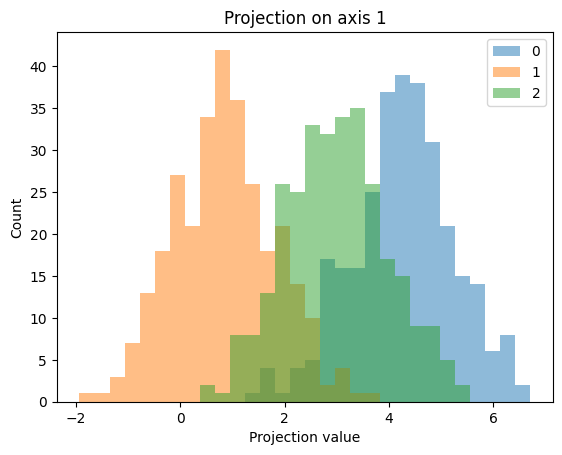

In [ ]:
# Projeção sobre a dimensão 1
projection_histogram(X, y, [0, 1, 2], np.array([[0], [1]]), "Projection on axis 1")

## Exercise 2 - Linear Discriminant Analysis

* Use sklearn's implementation of LDA to project the points in a single dimension and then plot the projected data

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Remember that since we want to project our data onto a vector, the parameter n_components of `LinearDiscriminantAnalysis` should be set to 1

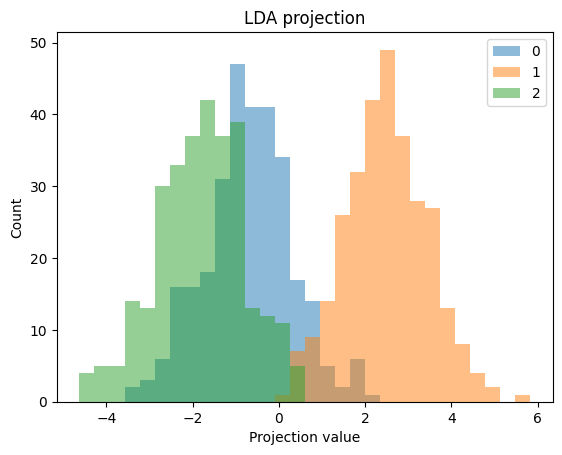

In [ ]:
# your code goes here: 

# Calculando a projeção pela LDA
lda = LinearDiscriminantAnalysis(n_components = 1)
lda.fit(X, y)
X_lda = lda.transform(X)

# Intervalo dos dados
min = X_lda.min()
max = X_lda.max()

# Barras idênticas para todas as classes
common_bars = np.linspace(min, max, 31)

# Plotando o histograma de cada classe
for classe in [0, 1, 2]:
    plt.hist(X_lda[y == classe], bins = common_bars, alpha = 0.5, label = classe)

plt.xlabel("Projection value")
plt.ylabel("Count")
plt.title("LDA projection")
plt.legend()
plt.show()

## Exercise 3 - Calculate test set accuracy

* use the default parameters for the LDA classifier, and report the prediction accuracy on a train/test split of 70/30% (use `random_state=0`)
* report also the accuracy of the `RidgeClassfier` you used in Part I 

In [15]:
from sklearn.model_selection import train_test_split

In [ ]:
# your code goes here:

# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Aprendendo e prevendo com o LDA
lda = LinearDiscriminantAnalysis(n_components = 1)
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

# Calculando a acurácia
lda_accuracy = accuracy_score(y_test, y_pred)

# Aprendendo e prevendo com o Ridge
r = RidgeClassifier()
r.fit(X_train, y_train)
y_pred = r.predict(X_test)

# Calculando a acurácia
ridge_accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracies:")
print("LDA classifier: ", lda_accuracy)
print("Ridge Classifier fitting: ", ridge_accuracy)

Test Accuracies:
LDA classifier:  0.937037037037037
Ridge Classifier fitting:  0.9259259259259259


# Part III - Logistic Regression for Binary Classification

## Exercise 1 - Load the dataset

* Load the diabetes dataset (`diabetes.csv`)
* Make a 70/30% train test partition of the dataset

*Suggestion:* I suggest you load it with pandas, but make a scikit-learn style dataset ($X$, $y$ numpy arrays)

In [16]:
# your code goes here:

# Carregando os dados
data = pd.read_csv("diabetes.csv")
y = data["Outcome"]
X = data.drop("Outcome", axis = 1)

# Adicionando a coluna do bias
X.insert(0, "bias", 1)

# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

## Excercise 2 - Implementing Logistic Regression

* In this exercise you will implement the logistic regression algorithm to learn the vector of weights $\vec{w}$.
* You will then plot the ROC curve (using your implementation from the Tarefa), and calculate the AUROC (Area Under the ROC curve) using `sklearn.metrics.roc_auc_score()` for the testing set.

You can follow the structure for gradient descent as described in the previous labs and slides. Don't forget to write a function that calculates the sigmoid. You are not allowed in this exercise to use any existing functions.
* **Note that:** in the book and slides `y` is written as `t` and `y_hat` as `y`. 

Remember that $\nabla E(w) = \sum_{n=1}^N (y_n - t_n)\phi_n$ 

* _Tip:_ plot the loss during training to verify that everything is working properly.

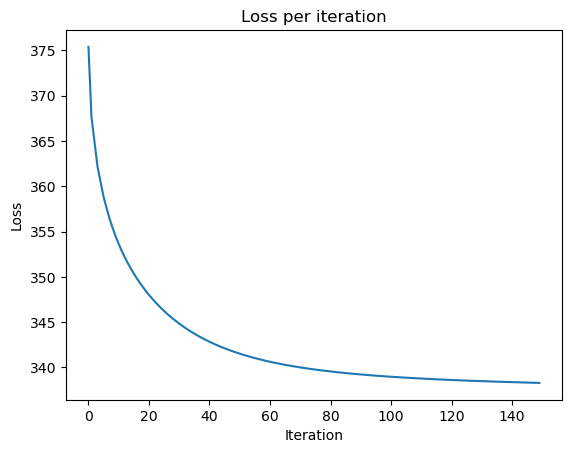

In [17]:
# your code goes here:

# Função para calcular a sigmoide
def sigmoid(a):
    result = 1/(1 + np.exp(-a))
    return result

# Função para calcular o erro pela entropia cruzada
def cross_entropy(y_true, y_pred):
    return -(y_true.T @ np.log(y_pred) + (1 - y_true).T @ np.log(1 - y_pred))

# Função para aprender os parâmetros da regressão logística
def logistic_regression(X, y, lr, max_iter):
    # Histórico dos erros
    history_loss = []
    # Número de características
    n_of_features = X.shape[1]

    # Inicializando o w
    w = np.random.normal(scale = 0.001, size = n_of_features)

    # Fazendo a primeira predição
    y_pred = sigmoid(X @ w)

    # Para cada iteração...
    for iteration in range(max_iter):
        # Calcula o gradiente
        gradient = X.T @ (y_pred - y)
        # Atualiza o w
        w -= lr * gradient
        # Faz a nova predição
        y_pred = sigmoid(X @ w)
        # Calcula e salva o erro
        error = cross_entropy(y, y_pred)
        history_loss.append(error)

    # Plotando o gráfico do erro por iteração
    plt.plot(history_loss)
    plt.title("Loss per iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()

    return w

# Aprendendo os parâmetros
w = logistic_regression(X_train, y_train, 0.0000004, 150)

Evaluate the performance of your model, plot the ROC curve and calculate the AUROC

In [ ]:
from sklearn.metrics import roc_auc_score

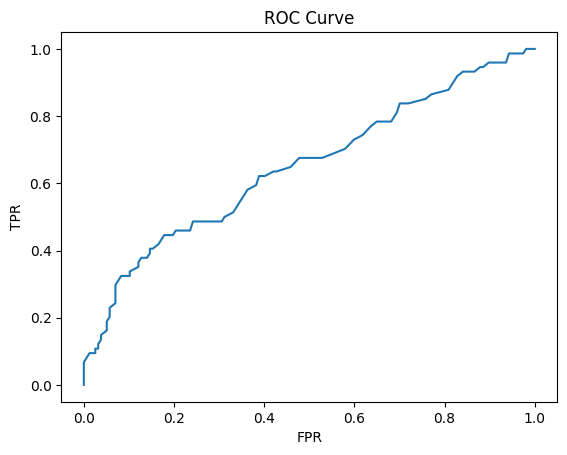

In [ ]:
# your code goes here: 

# Função para plotar a curva ROC
def roc_curve(y_true, y_pred, n_of_thresholds):

    # Lista com os pontos da curva
    points = []

    # Número de dados
    n_of_datapoints = y_true.size
    # Array com os thresholds
    thresholds = np.linspace(0, 1, n_of_thresholds)
    # Número de dados positivos e negativos
    positives = np.sum(y_true)
    negatives = n_of_datapoints - positives

    # Para cada threshold...
    for threshold in thresholds:
        # Prediz os dados como verdadeiros ou falsos (classes 1 e 0)
        y_classes = y_pred >= threshold

        # Calcula o número de verdadeiros positivos
        true_positives = np.sum(y_true @ y_classes)
        # Calcula o número de falsos positivos
        false_positives = np.sum((y_classes - y_true) == 1)
        
        # Calcula as taxas de verdadeiro positivo e de falso positivo
        tpr = true_positives / positives
        fpr = false_positives / negatives

        # Adiciona na lista
        points.append([fpr, tpr])

    # Convertendo para um array para plotar o gráfico
    points = np.array(points)

    # Plotando o gráfico
    plt.plot(points[:, 0], points[:, 1])
    plt.title("ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

# Predizendo no conjunto de teste com os parâmetros aprendidos
y_pred = sigmoid(X_test @ w)

roc_curve(y_test, y_pred, y_pred.size)

In [ ]:
# Calculando a área sob a curva ROC
auc_score = roc_auc_score(y_test, y_pred)
print("Score AUC: ", auc_score)

Score AUC:  0.6497676019969014


# Part IV - Logistic Regression for multi-class classification

## Exercise 1 - Load the dataset
* Load the famous Iris dataset (using sklearn as shown below)
* Load the data in a matrix $X$ and the target in a vector $y$.
* Make a 70/30% train test partition of the dataset

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

Prepare $X$ and $y$

In [ ]:
# your code goes here:

X = iris["data"]
y = iris["target"]

Split the data

In [ ]:
# your code goes here:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Exercise 2 - Train the Logistic Regression model
Train your LogisticRegression multi-class classifier using the sklearn implementation. 
* To use the cross entropy loss function and softmax activation function, the `multi_class` parameter needs to be set to "multinomial"

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Let's create an instance of the LogisticRegression classifier for multiclass classification
lr_iris = LogisticRegression(multi_class='multinomial',solver='newton-cg')

Fit the data

In [ ]:
# your code goes here: 

lr_iris.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

## Exercise 3 - Make predictions and evaluate the model
Use the `predict_proba()` method to obtain the output of the predictions for the testing set. The values are the output of the softmax activation function. 
* Remember that the highest value of each prediction corresponds to the actual predicted class.
* Write a function `get_predicted_class()` that transforms the vector of softmax outputs (obtained from `predict_proba()`) to a vector that just contains the predicted class. 
    - This function takes as input a matrix $\hat{Y}_{proba} \in \mathbb{R}^{m\times k}$ where $m$ is the number of samples in the testing set and $k$ is the number of classes.

As an example: if the softmax output is as follows: `Y_pred_sm = [[0.1,0.2,0.7], [0.4,0.3,0.3]]`, then `get_predicted_class(Y_pred_sm)` should return: `[2,0]` as the highest value for the 1st prediction is class 2 and for the 2nd prediction is class 0.

In [ ]:
# complete the input argument for the function to obtain the predictions for the testing set.
y_pred_sm = lr_iris.predict_proba()
y_pred = get_predicted_class(y_pred_sm)

In [ ]:
def get_predicted_class(Y_proba):
    # your code goes here:
    
    # Número de dados
    n_of_datapoints = Y_proba.shape[0]
    # Inicializando o array com as classes previstas
    predicted_class = np.zeros((n_of_datapoints, 1))

    # Para cada dado...
    for row in range(n_of_datapoints):
        # A classe prevista é o índice do maior valor da linha correspondente na matriz de probabilidades
        predicted_class[row] = np.argmax(Y_proba[row])

    return predicted_class


# Calculando as probabilidades no conjunto de teste
y_pred_sm = lr_iris.predict_proba(X_test)
# Fazendo as predições de classe
y_pred = get_predicted_class(y_pred_sm)
y_pred

array([[2.],
       [1.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [1.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.]])

Now calculate the accuracy in the testing set using `y_pred`

In [ ]:
# your code goes here:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9777777777777777
